In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
%matplotlib inline


In [6]:
df = pd.read_csv('kyphosis.csv')

In [7]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


In [10]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


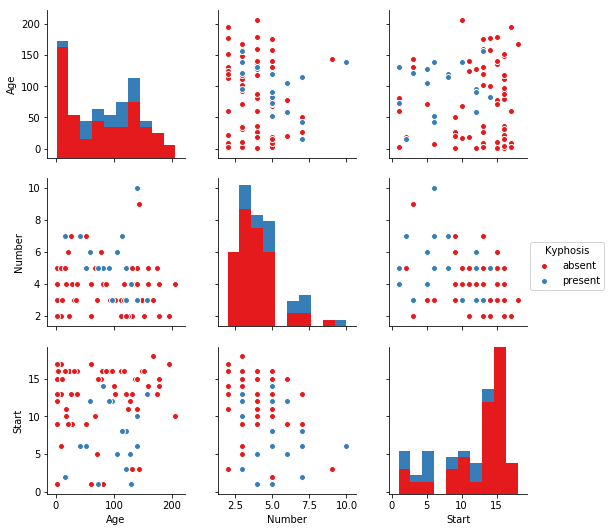

In [15]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree = DecisionTreeClassifier()

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
predictions = dtree.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.86      0.90      0.88        21
    present       0.33      0.25      0.29         4

avg / total       0.78      0.80      0.79        25



In [28]:
print(confusion_matrix(y_test,predictions))

[[19  2]
 [ 3  1]]


In [30]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

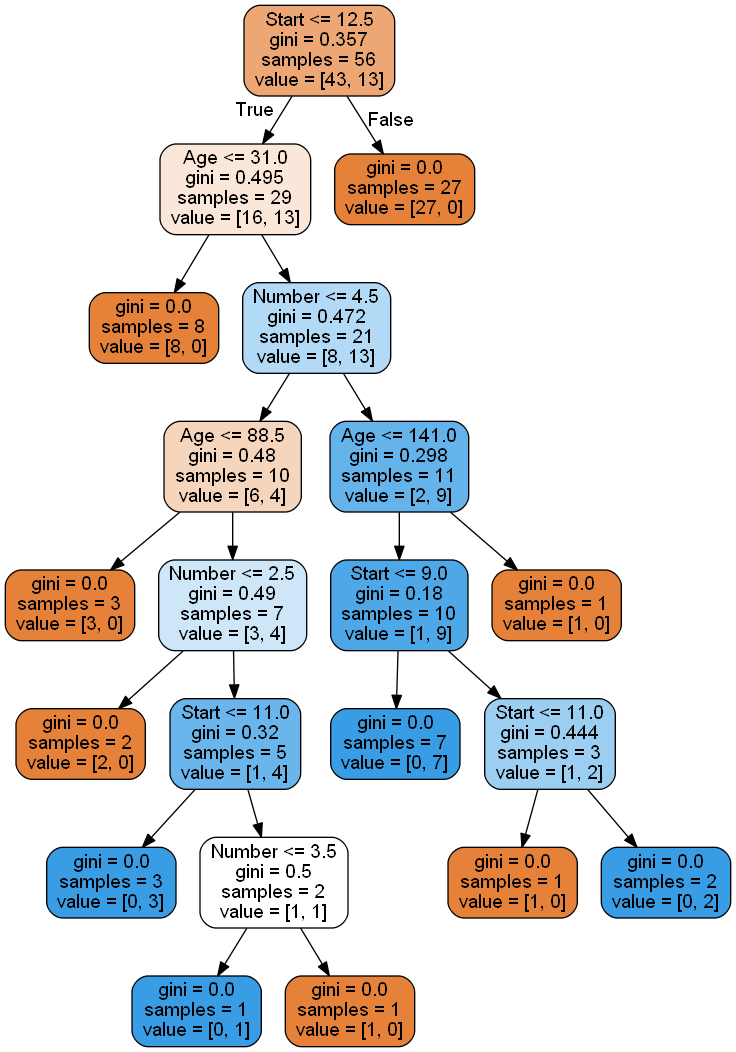

In [35]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [34]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\graphviz-2.38\release\bin'

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
rfc_pred = rfc.predict(X_test)

In [38]:
print(confusion_matrix(y_test,rfc_pred))

[[20  1]
 [ 4  0]]


In [40]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

     absent       0.83      0.95      0.89        21
    present       0.00      0.00      0.00         4

avg / total       0.70      0.80      0.75        25

